In [9]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
#import scikitplot as skplt

# Machine learning
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 


In [10]:
#LOADING DATA

df = pd.read_csv('/Users/devanshchawla/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [12]:
#SAMPLING DATA TO REDUCE THE TIME TAKEN AND INCREASE THE SPEED
df = df.sample(frac=0.1, random_state = 1)

#CHECKING THE NULL 
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 169876 to 97365
Data columns (total 31 columns):
Time      28481 non-null float64
V1        28481 non-null float64
V2        28481 non-null float64
V3        28481 non-null float64
V4        28481 non-null float64
V5        28481 non-null float64
V6        28481 non-null float64
V7        28481 non-null float64
V8        28481 non-null float64
V9        28481 non-null float64
V10       28481 non-null float64
V11       28481 non-null float64
V12       28481 non-null float64
V13       28481 non-null float64
V14       28481 non-null float64
V15       28481 non-null float64
V16       28481 non-null float64
V17       28481 non-null float64
V18       28481 non-null float64
V19       28481 non-null float64
V20       28481 non-null float64
V21       28481 non-null float64
V22       28481 non-null float64
V23       28481 non-null float64
V24       28481 non-null float64
V25       28481 non-null float64
V26       28481 non-null flo

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,94705.035216,-0.001143,-0.018290,0.000795,0.000350,-0.015666,0.003634,-0.008523,-0.003040,0.014536,...,0.004740,0.006719,-0.000494,-0.002626,-0.000917,0.004762,-0.001689,-0.004154,89.957884,0.001720
std,47584.727034,1.994661,1.709050,1.522313,1.420003,1.395552,1.334985,1.237249,1.204102,1.098006,...,0.744743,0.728209,0.645945,0.603968,0.520679,0.488171,0.418304,0.321646,270.894630,0.041443
min,0.000000,-40.470142,-63.344698,-31.813586,-5.266509,-42.147898,-19.996349,-22.291962,-33.785407,-8.739670,...,-16.640785,-10.933144,-30.269720,-2.752263,-7.025783,-2.534330,-8.260909,-9.617915,0.000000,0.000000
25%,53924.000000,-0.908809,-0.610322,-0.892884,-0.847370,-0.703986,-0.765807,-0.562033,-0.208445,-0.632488,...,-0.224842,-0.535877,-0.163047,-0.360582,-0.319611,-0.328476,-0.071712,-0.053379,5.980000,0.000000
50%,84551.000000,0.031139,0.051775,0.178943,-0.017692,-0.068037,-0.269071,0.028378,0.024696,-0.037100,...,-0.029075,0.014337,-0.012678,0.038383,0.015231,-0.049750,0.000914,0.010753,22.350000,0.000000
75%,139392.000000,1.320048,0.792685,1.035197,0.737312,0.603574,0.398839,0.559428,0.326057,0.621093,...,0.189068,0.533936,0.148065,0.434851,0.351466,0.253580,0.090329,0.076267,78.930000,0.000000
max,172784.000000,2.411499,17.418649,4.069865,16.715537,28.762671,22.529298,36.677268,19.587773,8.141560,...,22.588989,6.090514,15.626067,3.944520,5.541598,3.118588,11.135740,15.373170,19656.530000,1.000000


In [ ]:
#FRAUD CASE DISTRIBUTION
print(df.groupby('Class').size())

Class
0    28432
1       49
dtype: int64


In [ ]:
df_fraud = df[df['Class']==1]
df_true = df[df['Class']!=1]

fraud_perc = (len(df_fraud)/len(df))*100
print(fraud_perc)

0.17204452090867595


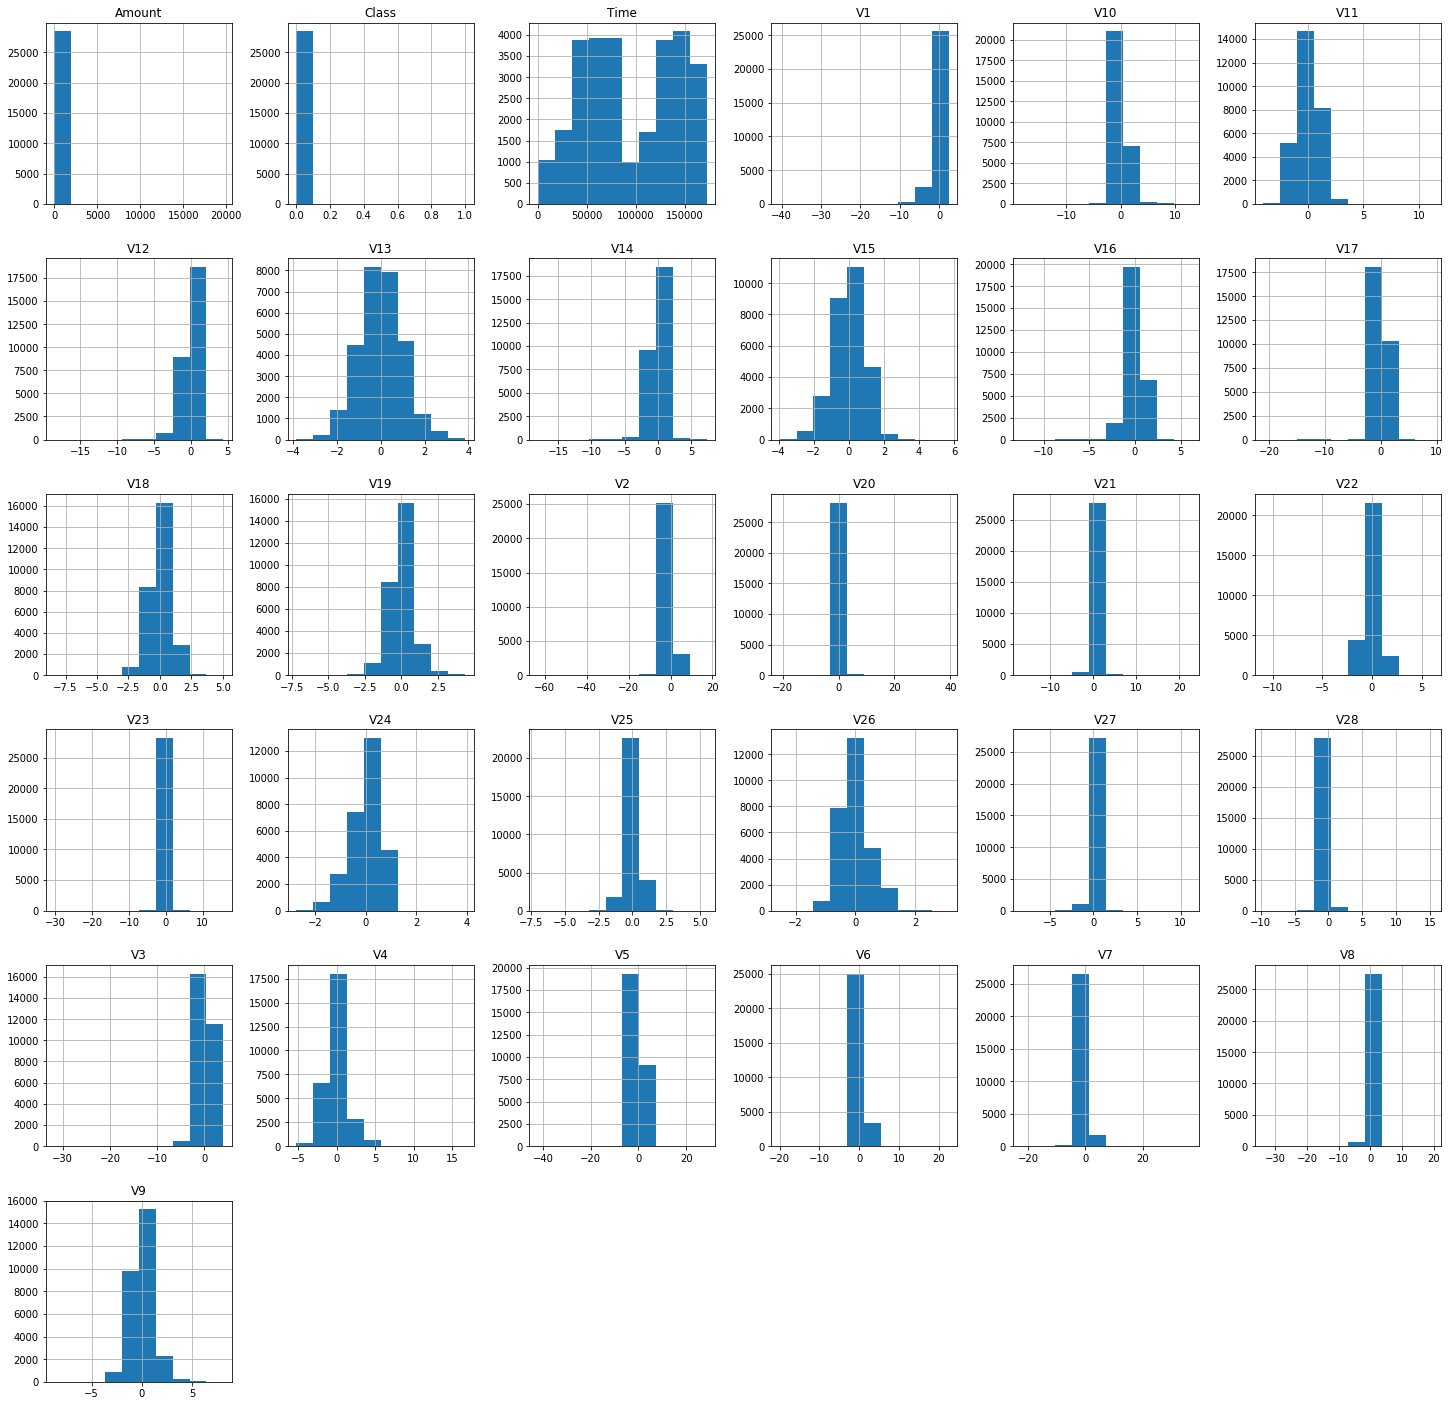

In [ ]:
df.hist(figsize = (25, 25))
plt.show()

In [ ]:
#CREATING X,y FOR THE MODEL
X = df.drop('Class',axis=1).values
y = df['Class'].values

print('columns in X {}'.format(df.drop('Class',axis=1).columns))
print('columns in y {}'.format('Class'))

columns in X Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
columns in y Class


In [ ]:
#SPLITTING THE DATA
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42, stratify = y)


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
#CLASSIFIERS
classifiers = { "LogisticRegression " : LogisticRegression() ,
                "KNearst " : KNeighborsClassifier() ,
                "Support Vector Classifier " : SVC() ,
                "Decision Tree Classifier " : DecisionTreeClassifier()
    
}

In [ ]:
for key , classifier in classifiers.items() :
    
    classifier.fit(X_train , y_train)
    training_score = cross_val_score(classifier,X_train , y_train , cv = 5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",round(training_score.mean(),2)
          *100,"% accuracy score")

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
log_reg_param = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_param)
grid_log_reg.fit(X_train,y_train)
log_reg = grid_log_reg.best_estimator_

In [ ]:
log_reg

In [ ]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knear_algo = GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knear_algo.fit(X_train,y_train)
knear_algo  = grid_knear_algo.best_estimator_

In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv = 5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knear_algo_score = cross_val_score(knear_algo,X_train,y_train, cv = 5)
print('KNeighbour Algorithm Score: ', round(knear_algo_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc,X_train , y_train , cv = 5 )
print('SVM Algorithm Score: ', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_clf_score =  cross_val_score( tree_clf,X_train , y_train , cv = 5 )
print('Tree classifier Score: ', round(tree_clf_score.mean() * 100, 2).astype(str) + '%')